## Preprocess data

In [14]:
import os
from os import listdir
from os.path import isfile, join
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import sys

### Resize images to 69x69x3

In [25]:
def resize_images(img_path, conv_path):
    """
    Resize images with 69*69*3
    """

    if not os.path.exists(conv_path):
        os.makedirs(conv_path)
        print("\nNew Directory created")
    onlyfiles = [f for f in listdir(img_path) if isfile(join(img_path, f))]
    print("Total files in input dir: {}".format(len(onlyfiles)))
    for i,f in enumerate(onlyfiles):
        #print(i)
        #print(f)
        print(img_path+'/'+f)
        img = Image.open(img_path+'/'+f)
        img = img.resize((69,69), Image.ANTIALIAS)
        newPath = conv_path+'/'+str(i)+'.jpeg'
        sys.stdout.write("\r {}".format(newPath))
        sys.stdout.flush()
        img.save(newPath)
        im = cv2.imread(newPath)
        # copy image to display all 4 variations
#         horizontal_img = im.copy()
#         vertical_img = im.copy()
#         both_img = im.copy()

#         # flip img horizontally, vertically,
#         # and both axes with flip()
#         horizontal_img = cv2.flip( im, 0 )
#         vertical_img = cv2.flip( im, 1 )
#         both_img = cv2.flip( im, -1 )
        
#         cv2.imwrite(conv_path+'/'+str(i)+'_1.jpeg',horizontal_img) 
#         cv2.imwrite(conv_path+'/'+str(i)+'_2.jpeg',vertical_img) 
#         cv2.imwrite(conv_path+'/'+str(i)+'_3.jpeg',both_img) 
        if(im.shape[2] != 3):
            print(im.shape)


### Convert images into list

In [26]:
def convert_images(img_path, label):
    """
    Convert images into list
    """
    onlyfiles = [f for f in listdir(img_path) if isfile(join(img_path,f))]

    data = []
    label = []
    rgb = []
    for i, f in enumerate(onlyfiles):
        img = cv2.imread(img_path+'/'+f)
        b,g,r = cv2.split(img)
        img2 = cv2.merge([r,g,b])
        rgb.append(img2)
        data.append(img)
        label.append(label)
    
    return rgb, label

### Find the 10% data 

In [27]:

def find_ten_percent(data):
    """
    calculate 10% of data
    """

    return int(len(data) * 0.1)

### Resize all images in images directory and store it in converted

In [30]:
folders = [name for name in os.listdir('./test_images')
            if os.path.isdir(os.path.join('./test_images', name))]
for d in folders:
    img_dir = './test_images/'+d
    conv_dir = './converted_test/'+d
    resize_images(img_dir, conv_dir)

Total files in input dir: 74
./test_images/apple/2Q== (1).jpg
 ./converted_test/apple/0.jpeg./test_images/apple/2Q== (2).jpg
 ./converted_test/apple/1.jpeg./test_images/apple/2Q== (3).jpg
 ./converted_test/apple/2.jpeg./test_images/apple/2Q==.jpg
 ./converted_test/apple/3.jpeg./test_images/apple/9k= (1).jpg
 ./converted_test/apple/4.jpeg./test_images/apple/9k= (2).jpg
 ./converted_test/apple/5.jpeg./test_images/apple/9k= (3).jpg
 ./converted_test/apple/6.jpeg./test_images/apple/9k=.jpg
 ./converted_test/apple/7.jpeg./test_images/apple/images (1).jpg
 ./converted_test/apple/8.jpeg./test_images/apple/images (10).jpg
 ./converted_test/apple/9.jpeg./test_images/apple/images (11).jpg
 ./converted_test/apple/10.jpeg./test_images/apple/images (12).jpg
 ./converted_test/apple/11.jpeg./test_images/apple/images (13).jpg
 ./converted_test/apple/12.jpeg./test_images/apple/images (14).jpg
 ./converted_test/apple/13.jpeg./test_images/apple/images (15).jpg
 ./converted_test/apple/14.jpeg./test_images

 ./converted_test/banana/48.jpeg./test_images/banana/images (52).jpg
 ./converted_test/banana/49.jpeg./test_images/banana/images (53).jpg
 ./converted_test/banana/50.jpeg./test_images/banana/images (54).jpg
 ./converted_test/banana/51.jpeg./test_images/banana/images (6).jpg
 ./converted_test/banana/52.jpeg./test_images/banana/images (7).jpg
 ./converted_test/banana/53.jpeg./test_images/banana/images (8).jpg
 ./converted_test/banana/54.jpeg./test_images/banana/images (9).jpg
 ./converted_test/banana/55.jpeg./test_images/banana/images.jpg
 ./converted_test/banana/56.jpeg./test_images/banana/Z (1).jpg
 ./converted_test/banana/57.jpeg./test_images/banana/Z (2).jpg
 ./converted_test/banana/58.jpeg./test_images/banana/Z (3).jpg
 ./converted_test/banana/59.jpeg./test_images/banana/Z (4).jpg
 ./converted_test/banana/60.jpeg./test_images/banana/Z.jpg
 ./converted_test/banana/61.jpeg
New Directory created
Total files in input dir: 55
./test_images/broccoli/2Q== (1).jpg
 ./converted_test/broccoli

 ./converted_test/onion/15.jpeg./test_images/onion/images (12).jpg
 ./converted_test/onion/16.jpeg./test_images/onion/images (13).jpg
 ./converted_test/onion/17.jpeg./test_images/onion/images (14).jpg
 ./converted_test/onion/18.jpeg./test_images/onion/images (15).jpg
 ./converted_test/onion/19.jpeg./test_images/onion/images (16).jpg
 ./converted_test/onion/20.jpeg./test_images/onion/images (17).jpg
 ./converted_test/onion/21.jpeg./test_images/onion/images (18).jpg
 ./converted_test/onion/22.jpeg./test_images/onion/images (19).jpg
 ./converted_test/onion/23.jpeg./test_images/onion/images (2).jpg
 ./converted_test/onion/24.jpeg./test_images/onion/images (20).jpg
 ./converted_test/onion/25.jpeg./test_images/onion/images (21).jpg
 ./converted_test/onion/26.jpeg./test_images/onion/images (22).jpg
 ./converted_test/onion/27.jpeg./test_images/onion/images (23).jpg
 ./converted_test/onion/28.jpeg./test_images/onion/images (24).jpg
 ./converted_test/onion/29.jpeg./test_images/onion/images (25).

### Convert images in converted directory to list

In [31]:
folders = [name for name in os.listdir('./converted_test')
            if os.path.isdir(os.path.join('./converted_test', name))]
train_list = []
test_list = []
train_list_label = []
test_list_label = []
for di, d in enumerate(folders):
    img_path = './converted_test/'+d
    onlyfiles = [f for f in listdir(img_path) if isfile(join(img_path,f))]
    print(len(onlyfiles))
    data = []
    label = []
    rgb = []
    for i, f in enumerate(onlyfiles):
        img = cv2.imread(img_path+'/'+f)
        b,g,r = cv2.split(img)
        img2 = cv2.merge([r,g,b])
        rgb.append(img2)
        data.append(img)
        label.append(di)
    #print(data)
    print(len(data))
    splitCount = int(len(rgb) * 0.1)
    print(len(rgb[:-splitCount]))
    print(len(rgb[-splitCount:]))
    pumtrain_list = (rgb[:-splitCount])
    pumtest_list = (rgb[-splitCount:])
    pumtrain_label_list = (label[:-splitCount])
    pumtest_label_list = (label[-splitCount:])
    print(len(pumtrain_list),' ',len(pumtrain_label_list),' test: ',len(pumtest_list),' ',len(pumtest_label_list))
    train_list += pumtrain_list
    test_list += pumtest_list
    train_list_label += pumtrain_label_list
    test_list_label += pumtest_label_list
    print('Total train data: ',len(train_list), 'total test ',(len(test_list)))
    print('Total train label: ',len(train_list_label), 'total test label',(len(test_list_label)))

74
74
67
7
67   67  test:  7   7
Total train data:  67 total test  7
Total train label:  67 total test label 7
62
62
56
6
56   56  test:  6   6
Total train data:  123 total test  13
Total train label:  123 total test label 13
55
55
50
5
50   50  test:  5   5
Total train data:  173 total test  18
Total train label:  173 total test label 18
35
35
32
3
32   32  test:  3   3
Total train data:  205 total test  21
Total train label:  205 total test label 21
69
69
63
6
63   63  test:  6   6
Total train data:  268 total test  27
Total train label:  268 total test label 27
69
69
63
6
63   63  test:  6   6
Total train data:  331 total test  33
Total train label:  331 total test label 33
11
11
10
1
10   10  test:  1   1
Total train data:  341 total test  34
Total train label:  341 total test label 34


In [32]:
train_list += test_list
train_list_label += test_list_label

[array([[[244, 244, 252],
         [244, 244, 252],
         [244, 244, 252],
         ..., 
         [232, 235, 240],
         [232, 235, 240],
         [232, 235, 240]],
 
        [[244, 244, 252],
         [244, 244, 252],
         [244, 244, 252],
         ..., 
         [232, 235, 240],
         [232, 235, 240],
         [232, 235, 240]],
 
        [[244, 244, 252],
         [244, 244, 252],
         [244, 244, 252],
         ..., 
         [232, 235, 240],
         [232, 235, 240],
         [232, 235, 240]],
 
        ..., 
        [[244, 245, 247],
         [244, 245, 247],
         [244, 245, 247],
         ..., 
         [233, 236, 241],
         [234, 237, 242],
         [234, 237, 242]],
 
        [[244, 245, 247],
         [244, 245, 247],
         [244, 245, 247],
         ..., 
         [233, 236, 241],
         [234, 237, 242],
         [234, 237, 242]],
 
        [[244, 245, 247],
         [244, 245, 247],
         [244, 245, 247],
         ..., 
         [233, 236, 241

### Shuffling the data

In [34]:
shuffle_train = []
for i,r in enumerate(train_list):
    d = []
    d.append(r)
    d.append(train_list_label[i])
    shuffle_train.append(d)
print('loop')
for i in range(0, 50):
    print(shuffle_train[i][1])

loop
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [35]:
set(test_list_label)

{0, 1, 2, 3, 4, 5, 6}

In [36]:
from random import shuffle
shuffle(shuffle_train)
print('loop')
for i in range(50, 100):
    print(shuffle_train[i][1])

loop
3
5
2
5
5
3
0
1
0
0
1
0
0
4
3
2
0
0
5
1
0
6
1
2
6
0
0
5
4
0
2
5
1
5
0
0
1
1
1
4
1
2
4
4
2
2
4
2
2
5


In [37]:
train_list = []
train_list_label = []
for i, d in enumerate(shuffle_train):
    train_list.append(d[0])
    train_list_label.append(d[1])
len(train_list)

375

In [38]:
train_data = np.array(train_list)
train_label = np.array(train_list_label)
test_data = np.array(test_list)
test_label = np.array(test_list_label)
train_data.shape

(375, 69, 69, 3)

In [39]:
data = {'train': train_data, 'train_labels': train_label, 'test':test_data, 'test_labels': test_label}

### Test images and labels

display image:  3


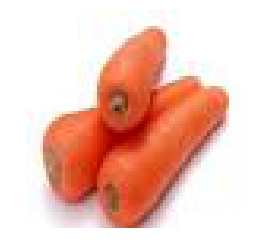

In [40]:
print('display image: ',train_label[100])
plt.axis('off')
plt.imshow(train_data[100])
plt.show()

In [41]:
import pickle


with open('new_data.pkl', 'wb') as handle:
    pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('new_data.pkl', 'rb') as handle:
    b = pickle.load(handle)


In [42]:
print(len(b['test']))
print(len(b['test_labels']))
print(len(b['train']))
print(len(b['train_labels']))

34
34
375
375
